In [33]:
import random
grammar = """
sentence = adj noun verb adv noun2
adj = adj_single adj_single 的 | null
adj_single = 漂亮 | 蓝色 | 好看
adv = 安静地 | 静静
noun = 猫 | 女人 | 男人
verb = adv 看着 | adv 坐着
noun2 = 桌子 | 皮球
"""

In [34]:
def build_grammar(grammar_str, split='='):
    grammar_pattern = {}
    for line in grammar_str.split('\n'):
        if not line:continue
        stmt, expr = line.split(split)
        grammar_pattern[stmt.strip()] = [e.split() for e in expr.split('|')]
    return grammar_pattern
grammar_pattern = build_grammar(grammar)

{'adj': [['adj_single', 'adj_single', '的'], ['null']],
 'adj_single': [['漂亮'], ['蓝色'], ['好看']],
 'adv': [['安静地'], ['静静']],
 'noun': [['猫'], ['女人'], ['男人']],
 'noun2': [['桌子'], ['皮球']],
 'sentence': [['adj', 'noun', 'verb', 'adv', 'noun2']],
 'verb': [['adv', '看着'], ['adv', '坐着']]}

In [37]:
def generate(grammar_pattern, target):
    if target not in grammar_pattern: return target
    expr = random.choice(grammar_pattern[target])
    tokens = [generate(grammar_pattern, e) for e in expr]
    print(tokens)
    return ''.join([t for t in tokens if t != 'null'])
generate(grammar_pattern,'sentence')

'女人安静地坐着安静地桌子'

In [47]:
import networkx

In [51]:
graph_long = {
    '1': '2 7',
    '2': '3', 
    '3': '4', 
    '4': '5', 
    '5': '6 10', 
    '7': '8',
    '6': '5',
    '8': '9',
    '9': '10', 
    '10': '5 11', 
    '11': '12',
    '12': '11',
}

In [52]:
for n in graph_long: graph_long[n] = graph_long[n].split()


In [53]:
air_route = networkx.Graph(graph_long)
%matplotlib inline

D:\ProgramData\Anaconda3\Lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
D:\ProgramData\Anaconda3\Lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
D:\ProgramData\Anaconda3\Lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
D:\ProgramData\Anaconda3\Lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in

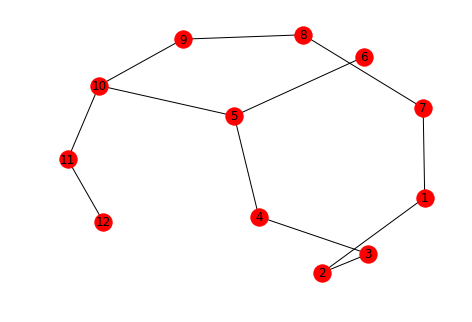

In [54]:
networkx.draw(air_route,with_labels = True)

In [56]:
def search (graph, concat_func):
    seen = set()
    need_visited = ['1']
    while need_visited:
        node = need_visited.pop()
        if node in seen: continue
        print('I am looking at:{}'.format(node))
        seen.add(node)
        new_discoveried = graph[node]
        need_visited = concat_func(new_discoveried,  need_visited)

In [59]:
def treat_new_discover_more_important(new_discoveried, need_visited):
    return new_discoveried + need_visited
def treat_already_discoveried_more_important(new_discoveried, need_visited):
    return need_visited + new_discoveried

# 深度遍历

In [63]:
search(graph_long , treat_already_discoveried_more_important)

I am looking at:1
I am looking at:7
I am looking at:8
I am looking at:9
I am looking at:10
I am looking at:11
I am looking at:12
I am looking at:5
I am looking at:6
I am looking at:2
I am looking at:3
I am looking at:4


# 广度遍历

In [64]:
search(graph_long , treat_new_discover_more_important)

I am looking at:1
I am looking at:7
I am looking at:2
I am looking at:8
I am looking at:3
I am looking at:9
I am looking at:4
I am looking at:10
I am looking at:5
I am looking at:11
I am looking at:6
I am looking at:12


# Mapping

In [65]:
BJ = 'Beijing'
SZ = 'Shenzhen'
GZ = 'Guangzhou'
WH = 'Wuhan'
HLG = 'Heilongjiang'
NY = 'New York City'
CM = 'Chiangmai'
SG = 'Singapore'

In [66]:
air_route = {
    BJ : {SZ, GZ, WH, HLG, NY}, 
    GZ : {WH, BJ, CM, SG},
    SZ : {BJ, SG},
    WH : {BJ, GZ},
    HLG : {BJ},
    CM : {GZ},
    NY : {BJ}
}

D:\ProgramData\Anaconda3\Lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
D:\ProgramData\Anaconda3\Lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
D:\ProgramData\Anaconda3\Lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
D:\ProgramData\Anaconda3\Lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in

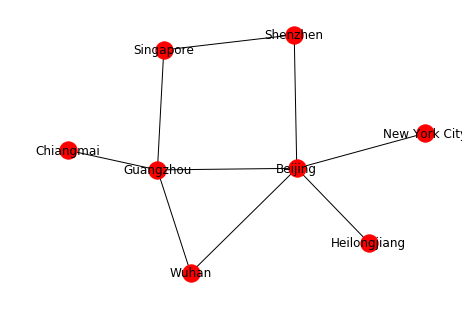

In [67]:
import networkx
air_route = networkx.Graph(air_route)
%matplotlib inline
networkx.draw(air_route, with_labels=True)


In [80]:
def search_desitination(graph, start, destination):
    pathes = [[start]]
    seen = set()
    choosen_pathes = []
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        if froniter in seen: continue
        # get new lines
        
        for city in graph[froniter]:
#             new_path = path + [city]
            new_path =  path + [city] 

            pathes.append(new_path)
            if city == destination: return new_path
        
        seen.add(city)
    return choosen_pathes

In [81]:
def draw_route(cities): return ' ✈️ -> '.join(cities)



In [82]:
draw_route(search_desitination(air_route, SZ, CM))


'Shenzhen ✈️ -> Beijing ✈️ -> Guangzhou ✈️ -> Chiangmai'